<a href="https://colab.research.google.com/github/Intelligentlyfavoured/Artificial-Intelligence/blob/main/knn_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Data preparation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Implementating the KNN

In [ ]:
import numpy as np

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all training samples
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get indices of the k nearest samples
        k_indices = np.argsort(distances)[:self.k]
        # Get the labels of the k nearest samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Majority vote
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


# Training and testing

In [ ]:
# Initialize classifier
classifier = KNNClassifier(k=3)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


# Visualization

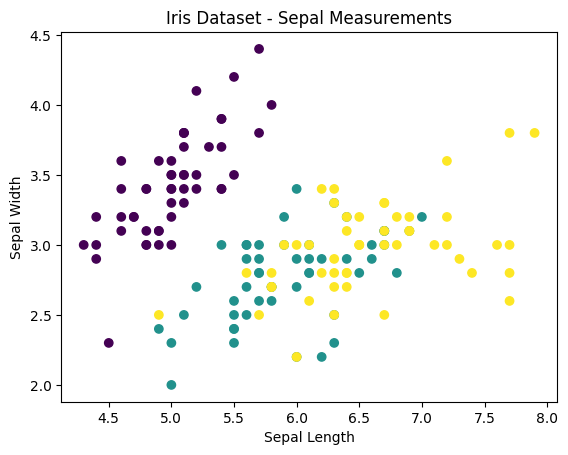

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of the Iris dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset - Sepal Measurements')
plt.show()
